<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/7_HuggingFace_%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torchvision

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from IPython.display import Image as _imgdis
from IPython.display import display
from PIL import Image


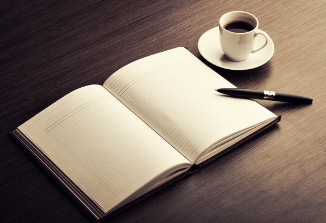

In [4]:
path = '/content/gdrive/MyDrive/pytest_img/opencv/pen_coffee.png'
display(_imgdis(filename=path, width=600, height=400))

In [5]:
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image = load_img(path)
classfier = pipeline('image-classification')
results = classfier(image)
print(results)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'cup', 'score': 0.23439274728298187}, {'label': 'espresso', 'score': 0.2330295741558075}, {'label': 'letter opener, paper knife, paperknife', 'score': 0.10450929403305054}, {'label': 'quill, quill pen', 'score': 0.07822377234697342}, {'label': 'coffee mug', 'score': 0.07125891745090485}]


In [6]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                                    label     score
0                                     cup  0.234393
1                                espresso  0.233030
2  letter opener, paper knife, paperknife  0.104509
3                        quill, quill pen  0.078224
4                              coffee mug  0.071259


In [7]:
from transformers import BeitImageProcessor, BeitForImageClassification
from PIL import Image
import requests

processor = BeitImageProcessor.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:412: UserWarning: The following named arguments are not valid for `BeitImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  image_processor = cls(**image_processor_dict)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/414M [00:00<?, ?B/s]

Predicted class: book


In [8]:
from transformers import Pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image = load_img(path)
classfier = pipeline(model='julien-c/hotdog-not-hotdog')
results = classfier(image)
print(results)

config.json:   0%|          | 0.00/621 [00:00<?, ?B/s]

Invalid model-index. Not loading eval results into CardData.


pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

Invalid model-index. Not loading eval results into CardData.


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


[{'label': 'hot dog', 'score': 0.5393959283828735}, {'label': 'not hot dog', 'score': 0.4606040418148041}]


In [9]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

         label     score
0      hot dog  0.539396
1  not hot dog  0.460604


In [10]:
!pip install timm

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

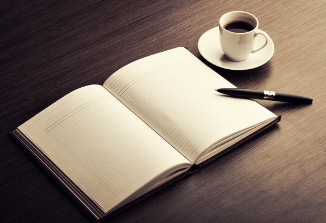

In [11]:
from IPython.display import Image as _imgdis
from IPython.display import display
from PIL import Image

path = '/content/gdrive/MyDrive/pytest_img/opencv/pen_coffee.png'
display(_imgdis(filename=path, width=600, height=400))

In [12]:
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image = load_img(path)
detector = pipeline('object-detection')
results = detector(image)
print(results)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Device set to use cpu


[{'score': 0.9935367703437805, 'label': 'knife', 'box': {'xmin': 216, 'ymin': 88, 'xmax': 314, 'ymax': 105}}, {'score': 0.9983748197555542, 'label': 'cup', 'box': {'xmin': 218, 'ymin': 9, 'xmax': 270, 'ymax': 62}}, {'score': 0.8251277804374695, 'label': 'dining table', 'box': {'xmin': 0, 'ymin': 0, 'xmax': 325, 'ymax': 222}}, {'score': 0.9977249503135681, 'label': 'book', 'box': {'xmin': 9, 'ymin': 45, 'xmax': 281, 'ymax': 222}}]


In [13]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

      score         label                                                box
0  0.993537         knife  {'xmin': 216, 'ymin': 88, 'xmax': 314, 'ymax':...
1  0.998375           cup  {'xmin': 218, 'ymin': 9, 'xmax': 270, 'ymax': 62}
2  0.825128  dining table   {'xmin': 0, 'ymin': 0, 'xmax': 325, 'ymax': 222}
3  0.997725          book  {'xmin': 9, 'ymin': 45, 'xmax': 281, 'ymax': 222}


In [14]:
from transformers import pipeline
from keras.preprocessing.image import array_to_img, img_to_array, load_img

image = load_img(path)

segmer = pipeline('image-segmentation')
results = segmer(image)
print(results)

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/172M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

Device set to use cpu
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.988335, 'label': 'knife', 'mask': <PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1EA50>}, {'score': 0.99682, 'label': 'LABEL_189', 'mask': <PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1D010>}, {'score': 0.999282, 'label': 'cup', 'mask': <PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1E5D0>}]


In [15]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
results_df = pd.DataFrame(results)
print(results_df)

      score      label  \
0  0.988335      knife   
1  0.996820  LABEL_189   
2  0.999282        cup   

                                                            mask  
0  <PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1EA50>  
1  <PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1D010>  
2  <PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1E5D0>  


In [16]:
print(results_df.iloc[0][0])
print(results_df.iloc[0][1])
print(results_df.iloc[0][2])

0.988335
knife
<PIL.Image.Image image mode=L size=326x223 at 0x7FA845E1EA50>


/tmp/ipython-input-2495904684.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results_df.iloc[0][0])
/tmp/ipython-input-2495904684.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results_df.iloc[0][1])
/tmp/ipython-input-2495904684.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results_df.iloc[0][2])


In [17]:
!pip install transformers

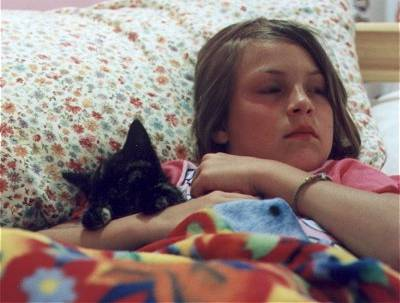

In [18]:
from PIL import Image

file = '/content/gdrive/MyDrive/pytest_img/cats_dogs/cat.6.jpg'
image = Image.open(file)
image

In [19]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [20]:
candidates = ['a cat is eating a meal', 'a photo of a cat', 'a photo of a dog', 'a cat is lying with woman',
              'a cat is lying with woman on the bed']

inputs = processor(text=candidates, images=image, return_tensors="pt", padding=True)


In [21]:
model.eval()
outputs = model(**inputs)
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [22]:
logits_per_image = outputs.logits_per_image
print(logits_per_image)

tensor([[19.7183, 24.0501, 19.4739, 27.2155, 28.7516]], grad_fn=<TBackward0>)


In [23]:
import torch
probs = logits_per_image.softmax(dim=1)
print(candidates[torch.argmax(probs).item()])

a cat is lying with woman on the bed


In [24]:
logits_per_image.sum()

tensor(119.2095, grad_fn=<SumBackward0>)

In [25]:
probs

tensor([[9.7483e-05, 7.4163e-03, 7.6347e-05, 1.7575e-01, 8.1666e-01]],
       grad_fn=<SoftmaxBackward0>)